In [40]:
import torch
import matplotlib.pyplot as plt
from dit import DiTModel
from rectifiedflow import RectifiedFlow

device = 'cuda' if torch.cuda.is_available() else 'cpu'
#gaussian2mnist
model_path = '/home/jiao/rltest/rectifiedflow/checkpoints/gaussian2mnist/99_0.07749117165803909.ckpt'
model = DiTModel(1,28,64,2,1,4,4,8)
model.load_state_dict(torch.load(model_path)['model'])
model.to(device)
rf = RectifiedFlow(model=model)

In [41]:
r, c = 3, 8
traj = rf.sample_ode(torch.randn(r*c,1,28,28,device=device),100)

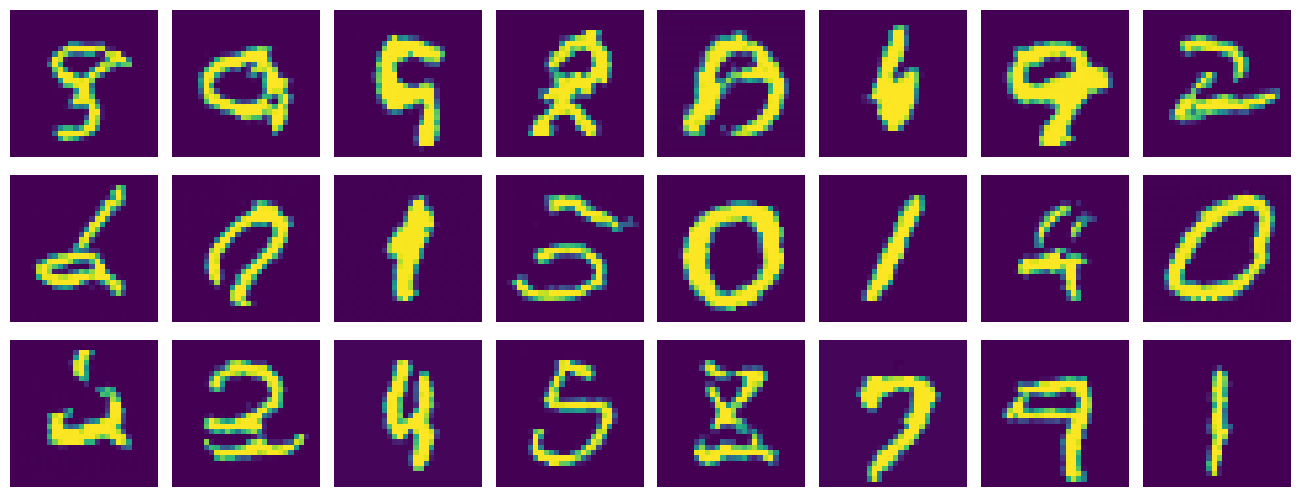

In [ ]:
for rindex in range(r):
    for cindex in range(c):
        ax = plt.subplot(r,c,rindex*c+cindex+1)
        ax.set_axis_off()
        plt.subplots_adjust(0,0,2,1,0.1,0.1)
        plt.imshow(traj[100][rindex*c+cindex,0].cpu().numpy())


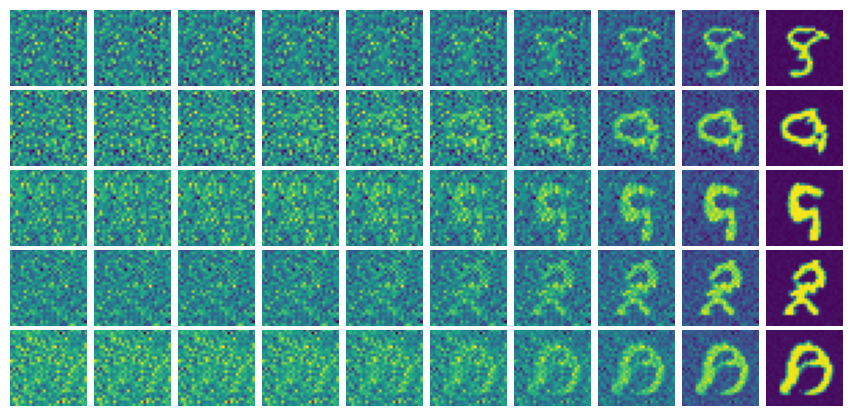

In [43]:
n=5
for nindex in range(n):
    for tindex in range(0,10):
        ax = plt.subplot(n+1,10,nindex*10+tindex+1)
        ax.set_axis_off()
        plt.subplots_adjust(0,0,1.3,1,0.1,0)
        plt.imshow(traj[tindex*10+9][nindex,0].cpu().numpy())
plt.savefig('traj')
    